# Sharpe Ratios for the Healthcare Sector

## IT Sector

In [1]:
import random
random.seed(3)

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,1,1).date()

tickers= ['INFY.NS', 'TCS.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS', 
         'LTI.NS', 'MINDTREE.NS', 'MPHASIS.NS', 'COFORGE.NS', 'LTTS.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


INFY.NS   TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS   LTI.NS  \
Date                                                                    
2017-01-02      NaN      NaN         NaN       NaN       NaN      NaN   
2017-01-03 -0.00724  0.00292     0.00803  -0.00965   0.00727 -0.00029   
2017-01-04  0.00392  0.00475     0.02610   0.01842   0.01841  0.02632   
2017-01-05 -0.00160 -0.01895    -0.01435   0.01009  -0.02497 -0.00917   
2017-01-06 -0.02399 -0.02270    -0.03581  -0.02175  -0.03759 -0.01670   
...             ...      ...         ...       ...       ...      ...   
2020-12-24 -0.01357  0.00021    -0.00352  -0.00869  -0.00095 -0.01343   
2020-12-28  0.00344  0.00689     0.00266   0.00183  -0.00016  0.00418   
2020-12-29  0.00806  0.00038     0.01530   0.00548   0.01959 -0.00846   
2020-12-30 -0.00280 -0.00723     0.00513  -0.00156   0.01823  0.01418   
2020-12-31  0.00722 -0.01600     0.00579   0.00481  -0.01022 -0.00045   

            MINDTREE.NS  MPHASIS.NS  COFORGE.NS  LTTS.NS  
Date                                                      
2017-01-02          NaN         NaN         NaN      NaN  
2017-01-03     -0.01703    -0.03622     0.01067  0.00602  
2017-01-04      0.03642    -0.00586     0.01381 -0.00296  
2017-01-05     -0.00513     0.00739    -0.01442  0.00260  
2017-01-06     -0.04487    -0.02062    -0.01835 -0.00722  
...                 ...         ...         ...      ...  
2020-12-24      0.00100    -0.01339     0.00773  0.01272  
2020-12-28      0.00695     0.00386     0.01446  0.01718  
2020-12-29      0.00805    -0.00087    -0.00386 -0.00749  
2020-12-30      0.00506     0.02001     0.00526 -0.01369  
2020-12-31      0.01865    -0.03172     0.00392  0.00041  

[988 rows x 10 columns]

In [3]:
mean_returns = df.mean() 
cov_matrix = df.cov()

print(mean_returns)
print(cov_matrix)

INFY.NS        0.001221
TCS.NS         0.001125
HCLTECH.NS     0.001047
WIPRO.NS       0.000950
TECHM.NS       0.001008
LTI.NS         0.002014
MINDTREE.NS    0.001561
MPHASIS.NS     0.001377
COFORGE.NS     0.002325
LTTS.NS        0.001413
dtype: float64
              INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  TECHM.NS    LTI.NS  \
INFY.NS      0.000342  0.000169    0.000187  0.000141  0.000176  0.000144   
TCS.NS       0.000169  0.000281    0.000165  0.000129  0.000151  0.000112   
HCLTECH.NS   0.000187  0.000165    0.000324  0.000142  0.000189  0.000145   
WIPRO.NS     0.000141  0.000129    0.000142  0.000290  0.000140  0.000093   
TECHM.NS     0.000176  0.000151    0.000189  0.000140  0.000393  0.000158   
LTI.NS       0.000144  0.000112    0.000145  0.000093  0.000158  0.000483   
MINDTREE.NS  0.000164  0.000144    0.000178  0.000121  0.000197  0.000182   
MPHASIS.NS   0.000101  0.000090    0.000122  0.000082  0.000122  0.000142   
COFORGE.NS   0.000216  0.000168    0.000205  0.00015

In [4]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
import random
random.seed(3)

In [6]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [7]:
result

array([[0.34408491, 0.22063668, 1.5595091 , ..., 0.14756554, 0.03999659,
        0.07559726],
       [0.37603373, 0.22805546, 1.64886966, ..., 0.02120245, 0.10302802,
        0.09457673],
       [0.37429388, 0.23274096, 1.60819943, ..., 0.16847694, 0.14114125,
        0.07859678],
       ...,
       [0.37385131, 0.22106448, 1.69114151, ..., 0.16597421, 0.08755754,
        0.16049643],
       [0.35967292, 0.21617265, 1.6638225 , ..., 0.09596569, 0.14130544,
        0.05289373],
       [0.35960933, 0.22383083, 1.60661219, ..., 0.04278867, 0.15360348,
        0.08166814]])

In [8]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'INFY.NS',
 'TCS.NS',
 'HCLTECH.NS',
 'WIPRO.NS',
 'TECHM.NS',
 'LTI.NS',
 'MINDTREE.NS',
 'MPHASIS.NS',
 'COFORGE.NS',
 'LTTS.NS']

In [9]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe   INFY.NS    TCS.NS  HCLTECH.NS  WIPRO.NS  \
0     0.344085  0.220637  1.559509  0.081851  0.030936    0.137242  0.044651   
1     0.376034  0.228055  1.648870  0.048828  0.120412    0.097124  0.033145   
2     0.374294  0.232741  1.608199  0.036741  0.002248    0.001844  0.079548   
3     0.336237  0.212873  1.579521  0.121730  0.139609    0.132894  0.006844   
4     0.353793  0.215031  1.645312  0.001271  0.098879    0.144522  0.064304   
...        ...       ...       ...       ...       ...         ...       ...   
9995  0.352127  0.213026  1.652972  0.146953  0.181205    0.066004  0.050734   
9996  0.328019  0.208810  1.570897  0.028334  0.136095    0.037968  0.166708   
9997  0.373851  0.221064  1.691142  0.149705  0.003757    0.133823  0.071621   
9998  0.359673  0.216173  1.663822  0.135141  0.134535    0.013582  0.161114   
9999  0.359609  0.223831  1.606612  0.040814  0.116304    0.078927  0.155842   

      TECHM.NS    LTI.NS  MINDTREE.NS  MPHASIS.NS  COFORGE.NS   LTTS.NS  
0     0.159075  0.086622     0.196463    0.147566    0.039997  0.075597  
1     0.117430  0.164750     0.199505    0.021202    0.103028  0.094577  
2     0.217468  0.093494     0.180442    0.168477    0.141141  0.078597  
3     0.148293  0.087491     0.081021    0.142306    0.040905  0.098907  
4     0.083106  0.124595     0.079210    0.167630    0.060739  0.175744  
...        ...       ...          ...         ...         ...       ...  
9995  0.078822  0.088788     0.042871    0.143063    0.098519  0.103040  
9996  0.161924  0.083799     0.100503    0.073452    0.030158  0.181060  
9997  0.002534  0.168691     0.055841    0.165974    0.087558  0.160496  
9998  0.094277  0.101778     0.069408    0.095966    0.141305  0.052894  
9999  0.101149  0.055144     0.173759    0.042789    0.153603  0.081668  

[10000 rows x 13 columns]

In [10]:
result.shape

(10000, 13)

In [11]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean           0.419037
sd             0.234956
Sharpe         1.783468
INFY.NS        0.049951
TCS.NS         0.097103
HCLTECH.NS     0.006944
WIPRO.NS       0.091700
TECHM.NS       0.042952
LTI.NS         0.287663
MINDTREE.NS    0.046556
MPHASIS.NS     0.136442
COFORGE.NS     0.191897
LTTS.NS        0.048793
Name: 1469, dtype: float64


In [12]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean           0.313454
sd             0.200626
Sharpe         1.562381
INFY.NS        0.138251
TCS.NS         0.182839
HCLTECH.NS     0.024215
WIPRO.NS       0.255827
TECHM.NS       0.048390
LTI.NS         0.084942
MINDTREE.NS    0.035626
MPHASIS.NS     0.095434
COFORGE.NS     0.004723
LTTS.NS        0.129753
Name: 2801, dtype: float64


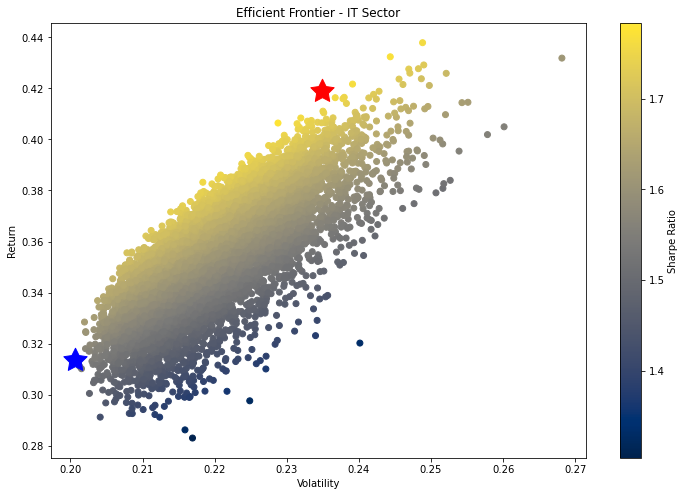

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Efficient Frontier - IT Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()